# Assignment 3 #
### Due: Monday, October 9th to be submitted via Canvas by 11:59 pm ###
### Total points: **90** ###

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names, UT EIDs and the homework group.**  

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

1. Homework Group - 71
2. Student Names - Milind Bhatia (mb67324) and Mansi Sharma (ms89743)

## Q1. (30 points) - Comparing MLPs

In this problem, we will be comparing different MLP configurations on the California Housing dataset and the Diabetes dataset.

In [14]:
import numpy as np
from copy import deepcopy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing, load_diabetes

In [15]:
seed = 42

In [16]:
# Load the Calinifornia Housing dataset and do train/val/test split
california_housing = fetch_california_housing()
housing_X, housing_y = california_housing['data'], california_housing['target']
housing_X_train, housing_X_tmp, housing_y_train, housing_y_tmp = train_test_split(housing_X, housing_y, test_size=0.4, random_state=seed)
housing_X_val, housing_X_test, housing_y_val, housing_y_test = train_test_split(housing_X_tmp, housing_y_tmp, test_size=0.5, random_state=seed)

housing_scaler = StandardScaler()
housing_X_train = housing_scaler.fit_transform(housing_X_train)
housing_X_val = housing_scaler.transform(housing_X_val)
housing_X_test = housing_scaler.transform(housing_X_test)
print(california_housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [17]:
# Load the Diabetes dataset and do train/val/test split
diabetes = load_diabetes()
diabetes_X, diabetes_y = diabetes['data'], diabetes['target']

diabetes_X_train, diabetes_X_tmp, diabetes_y_train, diabetes_y_tmp = train_test_split(diabetes_X, diabetes_y, test_size=0.4, random_state=seed)
diabetes_X_val, diabetes_X_test, diabetes_y_val, diabetes_y_test = train_test_split(diabetes_X_tmp, diabetes_y_tmp, test_size=0.5, random_state=seed)

diabetes_scaler = StandardScaler()
diabetes_X_train = diabetes_scaler.fit_transform(diabetes_X_train)
diabetes_X_val = diabetes_scaler.transform(diabetes_X_val)
diabetes_X_test = diabetes_scaler.transform(diabetes_X_test)
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

**Part 1** **(10 pts)**. Write the training and evaluation functions of the MLP. Use the default parameter values of sklearn.neural_network.MLPRegressor except:

*   **hidden_layer_size**: given by train_mlp parameter
*   **learning_rate_init**: given by a list of search space
*   **random_state**: given by train_mlp parameter
*   **max_iter**: fix at 300



In [27]:
def train_mlp(hidden_layer_size, X_train, y_train, X_val, y_val, seed):
    learning_rate_list = [1e-1, 1e-2, 1e-3, 1e-4]
    best_r2 = -np.inf # Determine the best model based on the R2 score on validation set # TO HIDE
    for lr in learning_rate_list:
        # Initialize MLPRegressor
        model = MLPRegressor(
        hidden_layer_sizes=hidden_layer_size,
        learning_rate_init=lr,
        random_state=seed,
        max_iter=300)
        # Fit the MLPRegressor to training data
        model.fit(X_train,y_train)

        # Predict and evaluate on train and validation data
        mse_train, r2_train = eval_model(model, X_train, y_train)
        mse_val, r2_val = eval_model(model, X_val, y_val)
        print(f"Learning rate: {lr} MSE train: {mse_train} R2 train: {r2_train} MSE val: {mse_val} R2 val: {r2_val}")

        # Record the best model according to R2 score on validation set
        if r2_val > best_r2:
            best_r2 = r2_val
            best_model = model
            best_lr = lr

    return best_model, best_lr, best_r2

def eval_model(model, X, y):
    # Predict and evaluate
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse, r2


**Part 2** **(5 pts)**.
Train two MLPs on the **housing dataset** with the following two different hidden layer size configurations and show their **MSE** and **R2 score** on the **test set**.
*   (8)
*   (64, 64)



In [28]:
### START CODE ###
hid_layer_size1 = 8
housing_model1, best_lr1, r2_val1 = train_mlp(hid_layer_size1, housing_X_train, housing_y_train, housing_X_val, housing_y_val, seed)
mse_test, r2_test = eval_model(housing_model1, housing_X_test, housing_y_test)
### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Learning rate: 0.1 MSE train: 0.35027525330390197 R2 train: 0.735982815073061 MSE val: 0.37267740826962115 R2 val: 0.714497094984831
Learning rate: 0.01 MSE train: 0.334521824008715 R2 train: 0.7478568370492932 MSE val: 0.35351651284456515 R2 val: 0.7291759866620738
Learning rate: 0.001 MSE train: 0.3343894234574139 R2 train: 0.7479566329112834 MSE val: 0.3549904264505432 R2 val: 0.7280468422414288
Learning rate: 0.0001 MSE train: 0.4331418308870668 R2 train: 0.673522791615294 MSE val: 0.4592155463352194 R2 val: 0.6482014482295081
Test MSE: 0.35000842201340565 Test R2: 0.7447291587040576


/Users/milindbhatia/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
### START CODE ###
hid_layer_size2 = (64,64)
housing_model2, mse_val2, r2_val2 = train_mlp(hid_layer_size2, housing_X_train, housing_y_train, housing_X_val, housing_y_val, seed)
mse_test, r2_test = eval_model(housing_model2, housing_X_test, housing_y_test)
### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Learning rate: 0.1 MSE train: 1.3327360827774057 R2 train: -0.004539217391315908 MSE val: 1.3100017113924098 R2 val: -0.003573830552108914
Learning rate: 0.01 MSE train: 0.16854813399278593 R2 train: 0.8729581851937008 MSE val: 0.30977096679939264 R2 val: 0.7626888323571255
Learning rate: 0.001 MSE train: 0.20584124261737996 R2 train: 0.844848801320963 MSE val: 0.28680314360190806 R2 val: 0.7802841576954743
Learning rate: 0.0001 MSE train: 0.2674151290220707 R2 train: 0.7984379744062987 MSE val: 0.31262030057434054 R2 val: 0.760505997948454
Test MSE: 0.27145967197808074 Test R2: 0.8020169387778013


/Users/milindbhatia/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


**Part 3** **(5 pts)**. Train a **linear regression model** on the **housing dataset** and show their MSE and R2 scores on the test set. How do the performances of the two MLPs and the linear regression model compare, and what do you think causes the difference?

In [30]:
### START CODE ###
linregmod_housing = LinearRegression()
linregmod_housing.fit(housing_X_train, housing_y_train)

mse_test, r2_test = eval_model(linregmod_housing, housing_X_test, housing_y_test)

### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Test MSE: 0.5546246533101031 Test R2: 0.5954968710766686


<div style="background-color: #f0f8ff; padding: 10px;">
   <font color="black" face="arial" size="4"> 

MLP performs better than Linear Regression:

- MLP - (8) : Test MSE: 0.35000842201340565 Test R2: 0.7447291587040576
- MLP - (64,64) : Test MSE: 0.27145967197808074 Test R2: 0.8020169387778013
- Linear Regression - Test MSE: 0.5546246533101031 Test R2: 0.5954968710766686

This maybe because the data may has some non-linearity which the linear model cannot capture whereas the MLP can capture. We also observe MLP with (64,64) performs betters which implies that adding an additional layer helps the model perform betters.
 
</font>
</div>



**Part 4** **(5 pts)**. Now, train two MLPs on the **diabetes dataset** with the following two different hidden layer size configurations and show their **MSE** and **R2 score** on the **test set**.
*   (8)
*   (64, 64)

In [31]:
### START CODE ###
hid_layer_size1 = (8)
diabetes_model1, mse_test, r2_test = train_mlp(hid_layer_size1, diabetes_X_train, diabetes_y_train, diabetes_X_val, diabetes_y_val, seed)
mse_test, r2_test = eval_model(diabetes_model1, diabetes_X_test, diabetes_y_test)
### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Learning rate: 0.1 MSE train: 2476.3467595024326 R2 train: 0.585898539459291 MSE val: 2517.632414913163 R2 val: 0.5632838571464868
Learning rate: 0.01 MSE train: 2923.5109570774443 R2 train: 0.511122522487204 MSE val: 2897.769455293564 R2 val: 0.4973441349506217
Learning rate: 0.001 MSE train: 23187.857938274905 R2 train: -2.8775368603787332 MSE val: 21269.44841782192 R2 val: -2.689462932964871
Learning rate: 0.0001 MSE train: 28400.91006149956 R2 train: -3.7492776575100377 MSE val: 26368.757515117697 R2 val: -3.5740045312528217
Test MSE: 3031.314085402528 Test R2: 0.4759604846674893


/Users/milindbhatia/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/milindbhatia/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/milindbhatia/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [32]:
### START CODE ###
hid_layer_size2 = (64,64)
diabetes_model2, mse_val2, r2_val2 = train_mlp(hid_layer_size2, diabetes_X_train, diabetes_y_train, diabetes_X_val, diabetes_y_val, seed)
mse_test, r2_test = eval_model(diabetes_model2, diabetes_X_test, diabetes_y_test)
### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Learning rate: 0.1 MSE train: 1206.4253098148006 R2 train: 0.7982582685924138 MSE val: 3723.5437400131673 R2 val: 0.35410282682550265
Learning rate: 0.01 MSE train: 2243.7063917974406 R2 train: 0.6248012963844647 MSE val: 2647.3837909669965 R2 val: 0.5407767905292498


/Users/milindbhatia/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate: 0.001 MSE train: 2708.36400051836 R2 train: 0.5470999834789378 MSE val: 2934.445638247401 R2 val: 0.49098217318872484
Learning rate: 0.0001 MSE train: 25172.631134438427 R2 train: -3.2094360486565927 MSE val: 23365.034950969693 R2 val: -3.0529697190830607
Test MSE: 3048.801456733654 Test R2: 0.47293734904425155


/Users/milindbhatia/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


**Part 5** **(5 pts)**. Train another linear regression model on the **diabetes dataset** and show its **MSE** and **R2 score** on the **test set**. How do the performances of two MLPs and the linear regression model compare? Is the performance order on the diabetes dataset the same as the one on the housing dataset? If not, what causes the difference?

In [33]:
### START CODE ###
linregmod_diabetes = LinearRegression()
linregmod_diabetes.fit(diabetes_X_train, diabetes_y_train)
mse_test, r2_test = eval_model(linregmod_diabetes, diabetes_X_test, diabetes_y_test)

### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Test MSE: 3245.6114009752355 Test R2: 0.43891375898156704


<div style="background-color: #f0f8ff; padding: 10px;">
   <font color="black" face="arial" size="4"> 

Similar to our housing data, the MLP model performs better than Linear Regression on diabetes dataset too:

- MLP - (8) : Test MSE: 3031.314085402528 Test R2: 0.4759604846674893
- MLP - (64,64) : Test MSE: 3048.801456733654 Test R2: 0.47293734904425155
- Linear Regression - Test MSE: 3245.6114009752355 Test R2: 0.43891375898156704

Moreoever, unlike housing data, we observe MLP with (8) performs betters than (64,64) which implies that adding an additional layer does not help the model perform betters.
 
</font>
</div>



#Q2. (20 points) Tensorflow Playground
In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).


Select **Classification** as the Problem Type. Among the four datasets shown in DATA, please select the top left dataset.

Use the following settings as the DEFAULT settings for all subquestions:


*   Learning rate = 0.03
*   Activation = Tanh
*   Regularization = None
*   Ratio of training to test data = 50%
*   Noise = 0
*   Batch Size = 30
*   input as  𝑋1  with  𝑋2
*   One hidden layer with 4 neurons

a) **(4 pts)** Use the DEFAULT setting and run two experiments -

1.   Using Tanh as the activation function
2.   Using the Linear activation function.

Report the train, test losses for both at the end of 1000 epochs. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this?

We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with Tanh as the activation.

b) **(4 pts)** Effect of number of hidden units: Keep other settings the same as in DEFAULT.


1.   Report the training loss and test loss at the end of 1000 epochs using 2 neurons and 8 neurons in the hidden layer.
2.   What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this?

c) **(4 pts)** Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT.

1.   For learning rate 10, 1, 0.1, 0.01 and 0.0001, report the train, test losses at the end of 100 epochs, 500 epochs and 1000 epochs respectively.
2.   What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? Also report your observations on the training and test loss curve (observe if you see noise for certain learning rates and reason why this is happening).



d) **(4 pts)** Effect of the number of layers:

1.   Change your activation to ReLU and use a single hidden layer with 4 neurons and then add another hidden layer with 3 neurons and train both your models for 1000 epochs.
2.   Comment on your final models and decision boundaries and observe your training and test loss curves as well.


e) **(4 pts)** Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as  sin(𝑋1),𝑋21  etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc.

<div style="background-color: #f0f8ff; padding: 10px;">
   <font color="black" face="arial" size="4"> 

a)

|     | Test Loss | Train Loss |
| --- | --- | --- |
| Tanh | 0.014 | 0.013 |
| Linear | 0.507 | 0.494 |


1. With the **tanh** activation function, decision boundaries are clearly defined and the classification is highly precise with very low training and test loss. This is because the activation function introduces non-linearity in the model which is essential for the neural network to learn.

2. On th contrary, with the **linear** activation, the datapoints are not correctly classified, and the decision boundaries are not well defined. This is the due to the fact that a linear model in unable to perform backpropagation which is crucial for training neural nets.

<br/>

b)
1.


|     | Test Loss | Train Loss |
| --- | --- | --- |
| 2 neurons | 0.272 | 0.243 |
| 8 neurons | 0.013 | 0.006 |


2. With 2 neurons, the decision boundaries are not clearly defined; whereas with increase in number of neurons in the hidden layer, the decision boundaries become much more defined and the classification is more precise. This is because few number of neurons in the hidden layer results in underfitting, which leads to poor classification of data points.

<br/>

c)

1.
**Learning Rate = 10**

|  Epochs   | Test Loss | Train Loss |
| --- | --- | --- |
| 100 | 0.523 | 0.459 |
| 500 | 0.681 | 0.552 |
| 1000 | 0.680 | 0.584 |

<br/>

**Learning Rate = 1**

|  Epochs   | Test Loss | Train Loss |
| --- | --- | --- |
| 100 | 0.024 | 0.021 |
| 500 | 0.002 | 0.001 |
| 1000 | 0.001 | 0.000 |

<br/>

**Learning Rate = 0.1**

|  Epochs   | Test Loss | Train Loss |
| --- | --- | --- |
| 100 | 0.040 | 0.035 |
| 500 | 0.009 | 0.009 |
| 1000 | 0.005 | 0.004 |

<br/>

**Learning Rate = 0.01**

|  Epochs   | Test Loss | Train Loss |
| --- | --- | --- |
| 100 | 0.367 | 0.356 |
| 500 | 0.256 | 0.212 |
| 1000 | 0.216 | 0.177 |

<br/>

**Learning Rate = 0.0001**

|  Epochs   | Test Loss | Train Loss |
| --- | --- | --- |
| 100 | 0.526 | 0.536 |
| 500 | 0.514 | 0.511 |
| 1000 | 0.511 | 0.497 |

2. With extreme learning rates like 10 or 0.0001, we observe very high losses for train and test curves. With 0.0001, the loss decreases slowly with increase in number of epochs, indicating that learning is sluggish. With a very high learing rate of 10, the loss curve is very noisy for a low number of epochs (n), whereas increasing n is showing an increase in loss, which could mean that we are moving away from the local minima.

  Better results are observed with learning rates 0.1 or 1, where loss is minimal; and the loss decreases rapidly to converge towards the optimal. The loss curve with LR =1 is noisy, and remains even with increasing number of epochs, whereas LR=0.1 gives the best results in our case.


d)
1.

Single hidden layer with 4 neurons :
Test Loss = 0.003
Train Loss = 0.002

  2 hidden layers (4 neurons, 3 neurons) :
Test Loss = 0.002
Train Loss = 0.001

2. For both models, the decision boundaries are clearly defined and the train and test losses are very similar. But with 2 hidden layers, the model converges to the the optimal faster as compared to the model with 1 hidden layer.


e)
We have taken LR =0.3, activation as tanh, and inputs as X1^2 and X2^2 with 2 neurons in one hidden layer. We get train and test loss as 0.01 within 30 epochs. We also tried decreasing the number of neurons to 1 in the hidden layer and acheieved the same loss within 50 epochs. This is a simple model and achieved the best results for us.

We also tried another model with inputs as X1X2, sin(X1) and sin(X2), learning rate = 0.3 and activation function tanh, with a single neuron in the hidden layer. This model gave a train loss of 0.380 and test loss 0f 0.383 which does nnot improve even with increasing epochs. To improve this model, we tried to increase the number of neurons in the hidden layer to 2. This helped bring down the train loss to 0.156 anf test loss to 0.176, but the decision boundaries are still not clearly defined.
We tried adding more hidden layers to this model and observed that it performs better with 2 hidden layers, but increasing layers beyond that causes noise in the train and test curves.
 
</font>
</div>



In [ ]:
from IPython import display

display.Image("https://raw.githubusercontent.com/milindbhatiaa/Advance_Machine_Learning/main/HW2/Images/Q4_part1_compiled.png")

# Q3. (10 points) - Principal Component Analysis

**Part 1.** (5 points) Briefly explain the main principle behind the Principal Component Analysis algorithm. In what sense is the selection of the eigenvectors to represent the data an optimal choice.  How do you reconstruct (a noisy version of) the original data from the eigenvectors and the scores?

**Part 2**. (5 points) Read this [article](https://erdem.pl/2020/04/t-sne-clearly-explained) on t-SNE, a dimensionality reduction technique for visualization and explain it in your own words in one or two paragraphs.

<div style="background-color: #f0f8ff; padding: 10px;">
   <font color="black" face="arial" size="4"> 

##### **Solution:**

**Part 1 :** 

**Pricipal Component Analysis :** The principal component analysis is a dimentionality reduction technique which transform a high dimentionality dataset into lower dimentionality while preserving as much information as possible. It transform the original data into principal components where the first components explains the most variance. These components are orthogonal eigen vectors. In a nutshell, the algorithm identifies the directionality of the data and then project the data on these directions to capture the patterns and essence. 

**Selection of Eigen Vectors :** The selection of eigen vectors is an optimal choice because it helps us in capturing the maximum variation in data while reducing dimentionality. The first principal component represents the eigen vectors that captured the maximum variations. All subsequent components represent the next highest variations captured. The percentage of variation in the data from eigen vectors are calculated using their corressponding eigen values. Secondly, eigen vectors are an optimal choice considering that they are orthogonal i.e., uncorrelated with each other that helps to avoid redundancy and multicollinearity.

**Reconstruction (a noisy version of) the original data :** To get our principal components, we perform a matrix multiplication between our original data and our eigen vector matrix. To reconstruct our original data from our components, we will perform a matrix multiplication between principal component matrix and transponse of our eigen vector matrix. If our principal components do not capture 100% variation in data, then we will have a noisy version of our original data.

**Part 2 :**

t-SNE (t-distributed Stochastic Neighbor Embedding) is a non-linear dimentionality technique which allows us to separate data which cannot be separated by a straight line. Unlike PCA, t-SNE is iterative and cannot be applied to a another dataset. For example: we could use the global covariance matrix in PCA from trainset on the testset but such a usecase is not possible in t-SNE. 

How it works?
- The main idea is to first choose a point and find similarity of that point with all other points in space. This process is repeated for all points. 
- To start, we first find euclidean distances of one chosen point with all other points and then general a gaussian distribute with mean as this chosen point and all other distances placed on X. The closer points to our mean essentially says that these points are in the neighborhood. This approachs fails to work if data points are not properly segmented into clusters.
- We scale the projected values by dividing it with the sum for all projected values to get scaled similarities (0 to 1). These similarities tell us if we our points are close or not. 
- All the the above points are telling us how t-SNE works intuitively however, we actually find similarities between points using conditional probability formula

$$ P(j|i) = \frac{{\exp\left(-\frac{{\|x_i - x_j\|^2}}{{2\sigma_i^2}}\right)}}{{\sum_{k \neq i} \exp\left(-\frac{{\|x_i - x_k\|^2}}{{2\sigma_i^2}}\right)}} $$

We also focus on perplexity here which simply means the number of neighbors we want near our central point.

We use student t-distribution algorithm to build a lower dimentionality space with a similar probability distribution that we calculated using above formula. Gaussian does not work here because it has low tail which leads to crowding problem. We use the below formula here:

$$ Q(i, j) = \frac{{\left(1 + \|y_i - y_j\|^2\right)^{-1}}}{{\left(\sum_{k \neq l} \frac{1}{{1 + \|y_i - y_k\|^2}}\right)^{-1}}} $$




Moreover, we optimize our distribution t-SNE by calculating gradients. Essentially, a gradient is calculated for each point which indicates how strong it should be pulled and the direction it should choose. 
 
</font>
</div>



# Q4. (20 points) - Principal Component Analysis

In this problem we will be applying PCA and T-SNE on the Superconductivity Dataset. More details on the dataset is present [here](https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data#). The goal here is to predict the critical temperature of a superconductor based on the features extracted.

First use Principal Component Analysis (PCA) to solve this problem.  

* **Part 1. (5 points)** Perform the following steps to prepare the dataset:
    * Load the dataset from the "Q4data.csv" file provided as a dataframe df.

    * Select the **'critical_temp'** column as the target column and the rest of the columns from the dataframe df as X.

    * Split the dataset into train and test set with 35% data in test set and random_state = 42

    * Perform [Standard Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) on the dataset. Remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.
    
    `Note: X should have 81 features.`
    




In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

Saving Q4data.csv to Q4data.csv


In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
import os, sys, re
import time
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
df = pd.read_csv("Q4data.csv")


In [2]:
y = df["critical_temp"]
X = df.drop(columns=["critical_temp"])

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scalar = StandardScaler()

### START CODE ###
### Scale the dataset
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)
### END CODE ###

* **Part 2 (5 points)** Use [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and reduce the dimension of X_train to the following number of components: `[3,20,40,60,81]`. For each of the five datasets, print the cumulative variance explained by the principal components`N = [3,20,40,60,81]`.(i.e. what percentage of variance in the original dataset is explained if we transform the dataset to have 3,20,40,60 and 81 principal components respectively).

  `Note : PCA should be fit on X_train and the components thus learnt should be later used to transform X_test`

In [3]:
from sklearn.decomposition import PCA
nums = [3,20,40,60,81]
res = []
for num in nums:
    ### START CODE ###
    ## Fit PCA
    pca = PCA(n_components=num)
    pca.fit(X_train_scaled)
    ### END CODE ###

    ### START CODE ###
    ## Transform Data
    X_train_pca= pca.transform(X_train_scaled)
    X_test_pca= pca.transform(X_test_scaled)
    ### END CODE ###

    ### START CODE ###
    ## Compute explained variance
    exp_var = pca.explained_variance_ratio_.cumsum()
    var = exp_var
    res.append(var[-1])
    ### END CODE ###

    print("Cumulative variance explained by {} components is {}".format(num,var[num-1])) #cumulative sum of variance explained with [n] features



Cumulative variance explained by 3 components is 0.5892605018668715
Cumulative variance explained by 20 components is 0.9694153554291602
Cumulative variance explained by 40 components is 0.9961365860216477
Cumulative variance explained by 60 components is 0.9995314271175003
Cumulative variance explained by 81 components is 1.0000000000000004


* **Part 3. (5 points)** Plot the cumulative variance explained by the principal components using the training data. The plot should display the number of components on X-axis and the cumulative explained variance on the y-axis. What do you understand from the plot obtained?

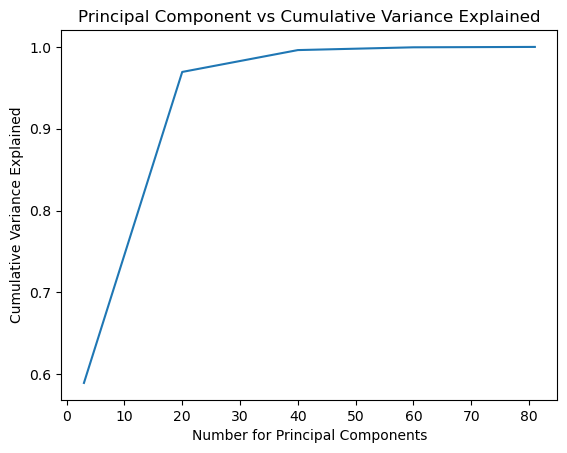

In [34]:
### START CODE ###
## Plot the explained variance vs number of components
plt.plot(nums,res)
plt.title('Principal Component vs Cumulative Variance Explained')
plt.xlabel('Number for Principal Components')
plt.ylabel('Cumulative Variance Explained')
### END CODE ###
plt.show()

<div style="background-color: #f0f8ff; padding: 10px;">
   <font color="black" face="arial" size="4"> 

As we increase the number of principal components, the total cumulative variance explained by these components keep increasing. We also observe that with only 3 principal components, we are able to capture almost 60% of the variation in data. After we hit 40 components, the variance does not change all that much implying diminishing returns. 

 
</font>
</div>



* **Part 4. (5 points)** For each of the reduced dataset, obtained in part 2.2, fit a linear regression model on the train data and show how adjusted $R^2$ varies as a function of # of components.(There will be a total of 5 ${R^2}$ score).


In [5]:
from sklearn.decomposition import PCA
nums = [3,20,40,60,81]
res = []
for num in nums:

    ### START CODE ###
    ## Fit PCA components
    pca = PCA(n_components=num)
    pca.fit(X_train_scaled)
    ### END CODE ###


    ### START CODE ###
    ## Transform train and test data
    X_train_new= pca.transform(X_train_scaled)
    X_test_new= pca.transform(X_test_scaled)
    ### END CODE ###

    ### START CODE ###
    ## Compute explained variance
    exp_var = pca.explained_variance_ratio_.cumsum()
    var = exp_var
    res.append(var[-1])
    ### END CODE ###

    ### START CODE ###
    ## Fit LR and compute R-square and adjusted R-squared
    lr = LinearRegression()
    lr.fit(X_train_new,Y_train)
    y_pred = lr.predict(X_test_new)
    avg_ytest = np.mean(Y_test)
    ssr = np.sum((y_pred - Y_test) ** 2)
    sst = np.sum((Y_test - avg_ytest) ** 2)
    r_squared = 1 - (ssr / sst)
    ### END CODE ###

    adjusted_r_squared = 1 - (1-r_squared)*(len(Y_test)-1)/(len(Y_test)-X_test_new.shape[1]-1)
    print("Adjusted R^2",adjusted_r_squared)

Adjusted R^2 0.4889533511401398
Adjusted R^2 0.6203369068712468
Adjusted R^2 0.6845717877710271
Adjusted R^2 0.7118245202543454
Adjusted R^2 0.7246468397073271


# Q5. (10 points) PCA vs T-SNE
* **Part 1.** **(3 points)** Now apply T-SNE to the dataset given above in Q4. You are required to carry out the following tasks:



1.   Initialize a t-SNE model with number of dimensions = 3, perplexity = 300, number of iterations = 300 and random state = 42
2.   Apply the t-SNE model to the training dataset











In [6]:
from sklearn.manifold import TSNE

### START CODE ###
## Initialize t-SNE model
tsne = TSNE(n_components=3,perplexity=300,n_iter=300,random_state=42)
### END CODE ###

### START CODE ###
## Fit and transform the data
X_train_tsne = tsne.fit_transform(X_train_scaled)
### END CODE ###

* **Part 2.** (3 points) For this part use a small subset of 500 samples of the training dataset and plot the first three t-SNE components similar to the PCA implementation above

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


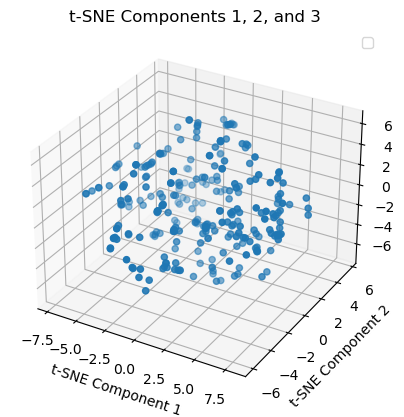

In [7]:
X_train_subset = X_train_tsne[:300]

# Extract the first three t-SNE components from X_train_subset
x = X_train_subset[:, 0]
y = X_train_subset[:, 1]
z = X_train_subset[:, 2]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z)

# Set axis labels
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')

# Set plot title
ax.set_title('t-SNE Components 1, 2, and 3')

# Show the plot
plt.legend()
plt.show()

* **Part 3. (4 points)** Now we will plot the PCA and t-SNE projections of the data and compare the plots side-by-side to see the difference in scatters created by the two methods. You can use first 1000 data points for this.

/var/folders/2q/jjvry_s10q578x_6qd2kc8j00000gn/T/ipykernel_9827/981369240.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1,2,1, projection='3d')
/var/folders/2q/jjvry_s10q578x_6qd2kc8j00000gn/T/ipykernel_9827/981369240.py:35: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1,2,2, projection='3d')


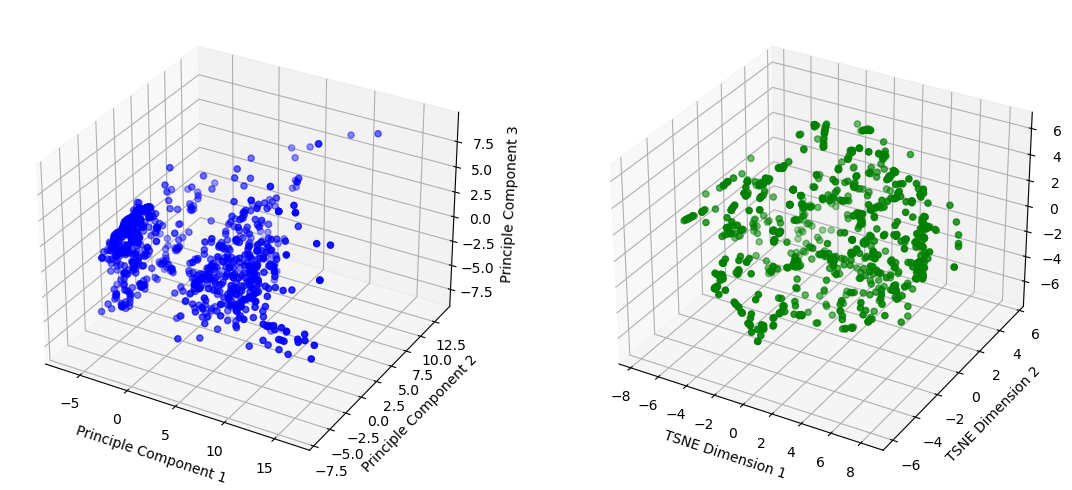

In [13]:
plt.figure(figsize=(12, 5))  # Adjust the figure size as needed

# First subplot (left)

### START CODE ###
### Obtain components from PCA
pca = PCA(n_components=3)
X_train_pca_1000 = pca.fit_transform(X_test_scaled[:1000])
### END CODE ###

plt.subplot(1, 2, 1)  # 1 row, 2 columns, select the first subplot
plt.title('PCA')

### START CODE ###
### scatter plot for PCA
ax = plt.subplot(1,2,1, projection='3d')

ax.scatter(X_train_pca_1000[:,0], X_train_pca_1000[:,1], X_train_pca_1000[:,2], c='b', marker='o')

# Add labels to the axes
ax.set_xlabel('Principle Component 1')
ax.set_ylabel('Principle Component 2')
ax.set_zlabel('Principle Component 3')
### END CODE ###


# Second subplot (right)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, select the second subplot
plt.title('TSNE')

### START CODE ###
### scatter plot for t-SNE
X_train_tsne_1000 = X_train_tsne[:1000]

ax = plt.subplot(1,2,2, projection='3d')

ax.scatter(X_train_tsne_1000[:,0], X_train_tsne_1000[:,1], X_train_tsne_1000[:,2], c='green', marker='o')

# Add labels to the axes
ax.set_xlabel('TSNE Dimension 1')
ax.set_ylabel('TSNE Dimension 2')
ax.set_zlabel('TSNE Dimension 3')
### END CODE ###

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()